In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
pd.set_option('display.expand_frame_repr', False)

Read CSV File

In [2]:
# Load the CSV file
data = pd.read_csv('/Users/minhbui/Documents/Biokind/2022 Bottoms Up Ball - Active.csv')
data_analyze = data.copy()
# print(data_analyze.head(10))
# print(data.head(5))

Clean data for City and State and format datetime

In [3]:
# Remove any leading/trailing whitespace characters from column names
data_analyze.columns = data_analyze.columns.str.strip()


# Standardize 'City' column to title case to avoid duplicates due to case sensitivity
data_analyze['City'] = data_analyze['City'].str.title()

# Fill missing values in 'City' and 'State/Province' with 'Unknown'
data_analyze['City'] = data_analyze['City'].str.strip().fillna('Unknown')
data_analyze['State/Province'] = data_analyze['State/Province'].str.strip().fillna('Unknown')

# This creates a mask to find rows where "City" contains only digits
number_only_cities = data_analyze['City'].astype(str).str.isdigit()

# Replace number-only cities with "Unknown"
data_analyze.loc[number_only_cities, 'City'] = "Unknown"

# Convert 'Donation Date' to datetime format
data_analyze['Donation Date'] = pd.to_datetime(data_analyze['Donation Date'])
# print(data.head(10))


Analyze based on donation date

In [4]:
# Group by Donation Date and calculate total donations
total_donations_date = data_analyze.groupby('Donation Date')['Donation Amount'].sum().reset_index()
print(total_donations_date)

   Donation Date  Donation Amount
0     2022-08-10           310.89
1     2022-08-12           300.00
2     2022-08-30           932.67
3     2022-09-03           300.00
4     2022-09-05           259.07
5     2022-09-11           155.45
6     2022-09-12           259.07
7     2022-09-14           259.07
8     2022-09-18           259.07
9     2022-09-26           310.89
10    2022-09-27           259.07
11    2022-09-28           699.50
12    2022-09-29           569.96
13    2022-10-04           880.85
14    2022-10-05           259.07
15    2022-10-06           259.07
16    2022-10-07           129.54
17    2022-10-12          2500.00
18    2022-10-14         27108.90
19    2022-10-17           259.07
20    2022-10-24           518.15
21    2022-10-28           310.90
22    2022-10-29         33646.05


In [5]:
# Group by Donation Date and calculate average donation amount
average_donations_date = data_analyze.groupby('Donation Date')['Donation Amount'].mean().reset_index()
print(average_donations_date)

   Donation Date  Donation Amount
0     2022-08-10       310.890000
1     2022-08-12       300.000000
2     2022-08-30       932.670000
3     2022-09-03       300.000000
4     2022-09-05       259.070000
5     2022-09-11       155.450000
6     2022-09-12       259.070000
7     2022-09-14       259.070000
8     2022-09-18       259.070000
9     2022-09-26       310.890000
10    2022-09-27       259.070000
11    2022-09-28       233.166667
12    2022-09-29       284.980000
13    2022-10-04       293.616667
14    2022-10-05       259.070000
15    2022-10-06       259.070000
16    2022-10-07        64.770000
17    2022-10-12      1250.000000
18    2022-10-14      3012.100000
19    2022-10-17       259.070000
20    2022-10-24       518.150000
21    2022-10-28       155.450000
22    2022-10-29       174.331865


In [6]:
# Group by Donation Date and count the number of donations
donation_counts_date = data_analyze.groupby('Donation Date')['Donation Amount'].count().reset_index()
print(donation_counts_date)

   Donation Date  Donation Amount
0     2022-08-10                1
1     2022-08-12                1
2     2022-08-30                1
3     2022-09-03                1
4     2022-09-05                1
5     2022-09-11                1
6     2022-09-12                1
7     2022-09-14                1
8     2022-09-18                1
9     2022-09-26                1
10    2022-09-27                1
11    2022-09-28                3
12    2022-09-29                2
13    2022-10-04                3
14    2022-10-05                1
15    2022-10-06                1
16    2022-10-07                2
17    2022-10-12                2
18    2022-10-14                9
19    2022-10-17                1
20    2022-10-24                1
21    2022-10-28                2
22    2022-10-29              193


Analyze data based on location

In [7]:
# Group by City and State/Province and calculate total donations
location_analysis = data_analyze.groupby(['City', 'State/Province']).agg({'Donation Amount': ['sum', 'mean', 'count']}).reset_index()



# Rename columns for better readability
location_analysis.columns = ['City', 'State/Province', 'Total Donation Amount', 'Average Donation Amount', 'Number of Donations']

location_analysis = location_analysis.sort_values(by='Total Donation Amount', ascending=False).reset_index(drop=True)

# Display the location-based analysis
print(location_analysis)

location_analysis.to_csv('location_based_analysis.csv', index=False)


             City State/Province  Total Donation Amount  Average Donation Amount  Number of Donations
0         Madison             WI               31030.06               646.459583                   48
1         Unknown        Unknown               19737.85               234.974405                   84
2     Sun Prairie             WI                7746.19               774.619000                   10
3       Cambridge             WI                3886.21               134.007241                   29
4       Middleton             WI                2636.90               263.690000                   10
5          Verona             WI                1621.03                81.051500                   20
6        Waunakee             WI                 818.15               409.075000                    2
7            Lodi             WI                 621.78               310.890000                    2
8       Mcfarland             WI                 611.43                87.347143  

In [8]:
# Group by City and State/Province and calculate total donations
state_analysis = data_analyze.groupby(['State/Province']).agg({'Donation Amount': ['sum']}).reset_index()



# Rename columns for better readability
state_analysis.columns = ['State/Province', 'Total Donation Amount']

state_analysis = state_analysis.sort_values(by='Total Donation Amount', ascending=False).reset_index(drop=True)

# Display the location-based analysis
print(state_analysis)

state_analysis.to_csv('state_analysis.csv', index=False)

  State/Province  Total Donation Amount
0             WI               50858.46
1        Unknown               19737.85
2             IL                 150.00


In [9]:
# Group by City and State/Province and calculate total donations
city_analysis = data_analyze.groupby(['City', 'State/Province']).agg({'Donation Amount': ['sum']}).reset_index()



# Rename columns for better readability
city_analysis.columns = ['City', 'State/Province', 'Total Donation Amount']

city_analysis = city_analysis.sort_values(by='Total Donation Amount', ascending=False).reset_index(drop=True)

# Display the location-based analysis
print(city_analysis)

city_analysis.to_csv('city_analysis.csv', index=False)

             City State/Province  Total Donation Amount
0         Madison             WI               31030.06
1         Unknown        Unknown               19737.85
2     Sun Prairie             WI                7746.19
3       Cambridge             WI                3886.21
4       Middleton             WI                2636.90
5          Verona             WI                1621.03
6        Waunakee             WI                 818.15
7            Lodi             WI                 621.78
8       Mcfarland             WI                 611.43
9      Fall River             WI                 518.15
10      Fitchburg             WI                 414.52
11      West Bend             WI                 310.89
12       Deforest             WI                 259.07
13      Green Bay             WI                 229.54
14        Chicago             IL                 150.00
15  Cottage Grove             WI                 129.54
16         Oregon             WI                

Plot the data based on location

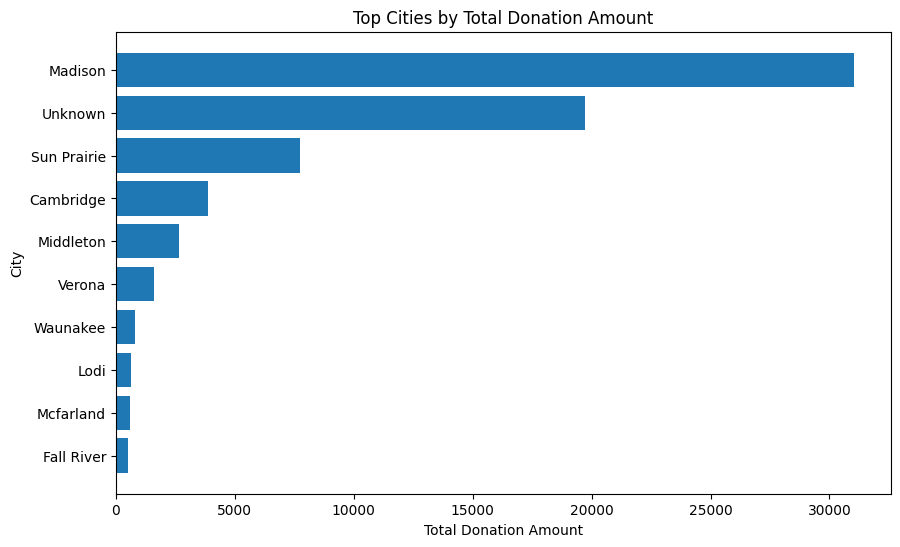

In [10]:
# Sort and select top cities if needed (e.g., top 10)
top_cities = location_analysis.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_cities['City'], top_cities['Total Donation Amount'])
plt.title('Top Cities by Total Donation Amount')
plt.xlabel('Total Donation Amount')
plt.ylabel('City')
plt.gca().invert_yaxis()  # Highest value at the top
plt.show()

Draw heatmap based on city and state

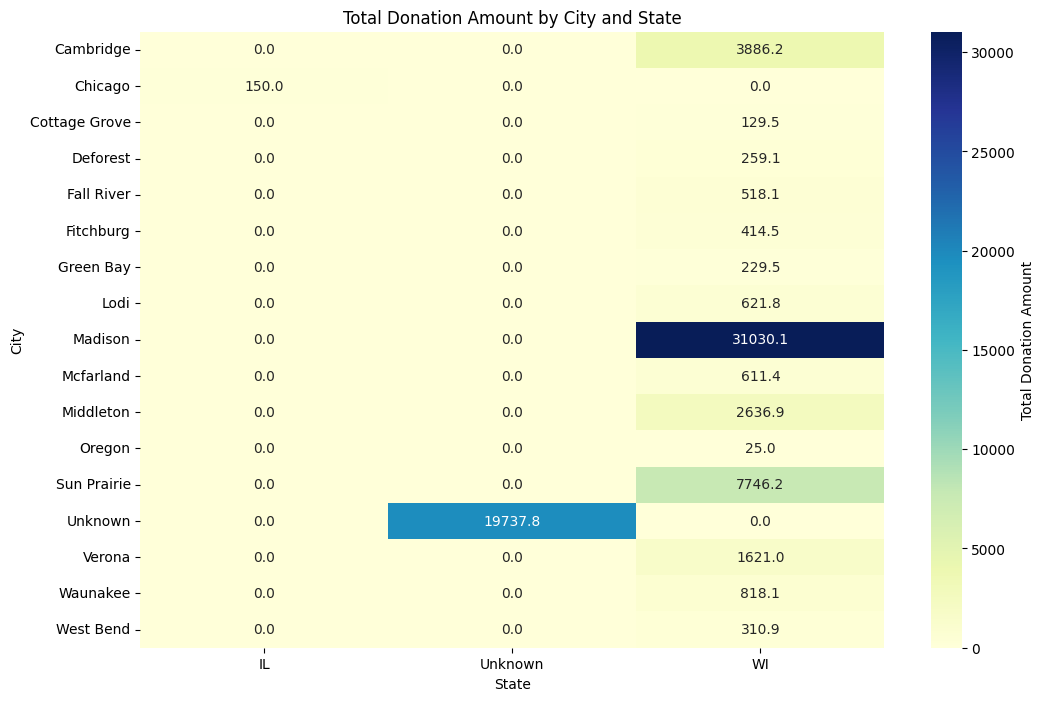

In [11]:
# Pivot table for heatmap
location_pivot = location_analysis.pivot(index='City', columns='State/Province', values='Total Donation Amount').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(location_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Total Donation Amount'})
plt.title('Total Donation Amount by City and State')
plt.xlabel('State')
plt.ylabel('City')
plt.show()

In [12]:
# Ensure the Donation Date column is in datetime format
data_analyze['Donation Date'] = pd.to_datetime(data['Donation Date'], errors='coerce')

# Group data by month and calculate the total donation amount
monthly_donations = data_analyze.groupby(data['Donation Date'].dt.to_period('M'))['Donation Amount'].sum()

# Plot the line graph using pandas
monthly_donations.plot(kind='line', figsize=(10, 6), marker='o', title='Total Donation Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Donation Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values